<a href="https://colab.research.google.com/github/sanazgit/OpenCV/blob/main/Contour_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

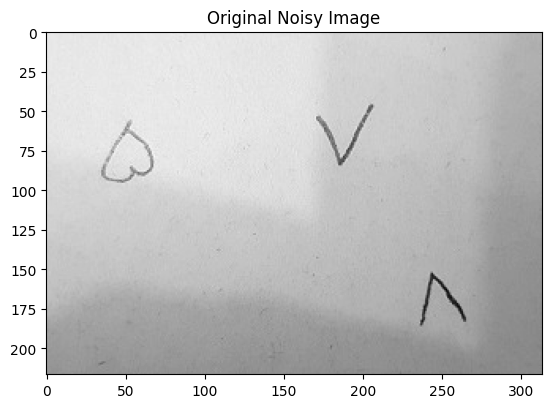

In [ ]:
img= cv2.imread("/content/drive/MyDrive/Colab Notebooks/Image/adad.jpg",0)
plt.imshow(img, cmap='gray');plt.title('Original Noisy Image');

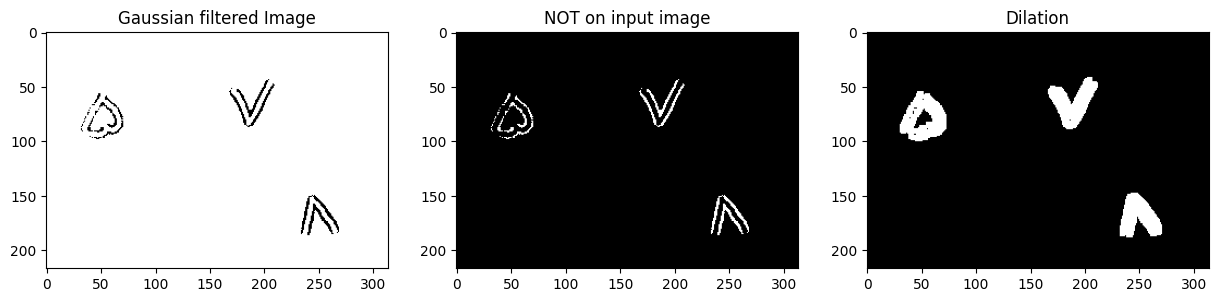

In [ ]:
img_not = cv2.bitwise_not(img)
noise_removed_image = cv2.GaussianBlur(img_not,(7,7),0)
binary_image= cv2.adaptiveThreshold(noise_removed_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,5,2)

not_img = cv2.bitwise_not(binary_image)
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(not_img, kernel, iterations = 1)

plt.figure(figsize=[15,7])
plt.subplot(131);plt.imshow(binary_image, cmap='gray');plt.title("Gaussian filtered Image");
plt.subplot(132);plt.imshow(not_img, cmap='gray');plt.title('NOT on input image');
plt.subplot(133);plt.imshow(dilation, cmap='gray');plt.title('Dilation');

In [ ]:
# Functions we'll use for sorting by position
def x_cord_contour(contours):
    """Returns the X cordinate for the contour centroid"""
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass


def label_contour_center(image, contours):
    """Places a red circle on the centers of contours"""
    for c in contours:
      M = cv2.moments(c)
      cx = int(M['m10'] / M['m00'])
      cy = int(M['m01'] / M['m00'])
      # Draw the countour number on the image
      cv2.circle(image,(cx,cy), 2, (0,0,255), -1)
    return image

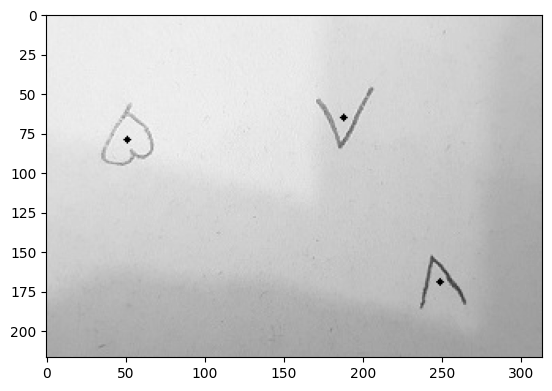

In [ ]:
# Find contours
contours, hierarchy = cv2.findContours(dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

centers= label_contour_center(img,contours)
plt.imshow(img, cmap='gray')

#Sort by left to right using our x_cord_contour function
contours_left_to_right = sorted(contours, key = x_cord_contour, reverse = False)



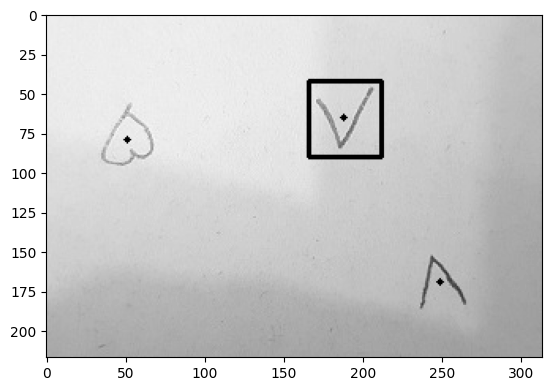

In [ ]:
boundRect = cv2.boundingRect(contours_left_to_right[1])
drawing = img.copy()

cv2.rectangle(drawing, (int(boundRect[0]), int(boundRect[1])), \
  (int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), (0,255,255), 2)
plt.imshow(drawing, cmap='gray')
